In [23]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import scipy.fftpack as sf
import scipy.signal as sig
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Amplitude')

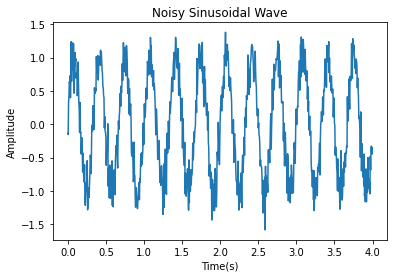

In [24]:
# Generate a signal
Fs = 200;
t = 4;
n = np.arange(0,t,1/Fs)
f = 3;
x = np.sin(2*pi*f*n)
# Generate a noise
y = np.random.normal(0, 0.2, np.size(x)); # AWGN
x = x + y; # noisy signal

plt.figure(1)
plt.plot(n,x); plt.title('Noisy Sinusoidal Wave')
plt.xlabel('Time(s)'); plt.ylabel('Amplitude')

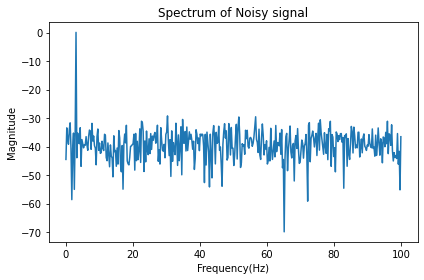

In [25]:
# Take spectral analysis
X_f = abs(sf.fft(x))
l = np.size(x)
fr = (Fs/2)*np.linspace(0,1,int(l/2))
xl_m = (2/l)*abs(X_f[0:np.size(fr)]);

plt.plot(fr,20*np.log10(xl_m)); plt.title('Spectrum of Noisy signal')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')
plt.tight_layout()


Text(0, 0.5, 'Magnitude')

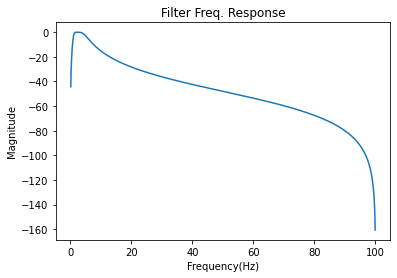

In [26]:
# Create a BPF
o = 2;
fc = np.array([1,5])
wc = 2*fc/Fs;
[b,a] = sig.butter(o, wc, btype = 'bandpass')

# filter response
[W,h] = sig.freqz(b,a, worN = 1024)

W = Fs* W/(2*pi)

plt.figure(2)
plt.plot(W, 20*np.log10(h)); plt.title('Filter Freq. Response')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')

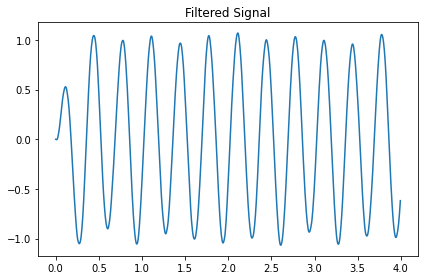

In [27]:
# Filter signal
x_filt = sig.lfilter(b,a, x)

plt.plot(n,x_filt); plt.title('Filtered Signal')
plt.tight_layout();